# Australian Housing Market EDA

### Import Libraries

In [1]:
# Installing an older version of plotly to work with different functions
# pip install plotly==2.7.0

In [2]:
import numpy as np 
import pandas as pd 
import os
from plotly.offline import init_notebook_mode, iplot
import plotly.plotly as py
import plotly.figure_factory as FF
from plotly import tools
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.features import DivIcon
from folium.plugins import HeatMap
import warnings
import datetime
import squarify
warnings.filterwarnings("ignore")

init_notebook_mode(connected=True)

# Results you write to the current directory are saved as output.

I will begin this notebook exploring data from the Melbourne, Australia housing market and then move into analyzing the data from the Sydney, Australia housing market. I would like to explore model building for the Sydney housing market over the Melbourne area because Melbourne is a more expensive city and I'm also exploring Australian cities becuase my sister is currently house hunting in Australia and she lives closer to the Sydney area.

### Importing the Data:

In [3]:
# Read in Melbourne Data
melbourne = pd.read_csv("mhm.csv")
melbourne.head()

Suburb           Address  Rooms Type      Price Method   SellerG  \
0    Abbotsford     49 Lithgow St      3    h  1490000.0      S    Jellis   
1    Abbotsford     59A Turner St      3    h  1220000.0      S  Marshall   
2    Abbotsford     119B Yarra St      3    h  1420000.0      S    Nelson   
3    Aberfeldie        68 Vida St      3    h  1515000.0      S     Barry   
4  Airport West  92 Clydesdale Rd      2    h   670000.0      S    Nelson   

        Date  Postcode             Regionname  Propertycount  Distance  \
0  1/04/2017      3067  Northern Metropolitan           4019       3.0   
1  1/04/2017      3067  Northern Metropolitan           4019       3.0   
2  1/04/2017      3067  Northern Metropolitan           4019       3.0   
3  1/04/2017      3040   Western Metropolitan           1543       7.5   
4  1/04/2017      3042   Western Metropolitan           3464      10.4   

                  CouncilArea  
0          Yarra City Council  
1          Yarra City Council  
2          Yarra City Council  
3  Moonee Valley City Council  
4  Moonee Valley City Council

### Data Cleaning and Visualization

In [4]:
# Checking for Missing Values
melbourne.isnull().sum().sort_values(ascending=False)

Price            14590
Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [5]:
# Dropping Missing Values
mel_full = melbourne[melbourne['Price'].notnull()]
mel_full.isnull().sum().sort_values(ascending=False)

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

In [6]:
# Copy/Rename Dataframe
mel = mel_full.copy()

# Check Region Names
mel['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'South-Eastern Metropolitan',
       'Eastern Metropolitan', 'Northern Victoria', 'Eastern Victoria',
       'Western Victoria'], dtype=object)

#### Building Histograms for Price by Region

In [7]:
# Price by Region
all_regions = mel['Price'].values
northern_metropolitan = mel['Price'].loc[mel['Regionname'] == 'Northern Metropolitan'].values
southern_metropolitan = mel['Price'].loc[mel['Regionname'] == 'Southern Metropolitan'].values
eastern_metropolitan = mel['Price'].loc[mel['Regionname'] == 'Eastern Metropolitan'].values
western_metropolitan = mel['Price'].loc[mel['Regionname'] == 'Western Metropolitan'].values
southeastern_metropolitan = mel['Price'].loc[mel['Regionname'] == 'South-Eastern Metropolitan'].values
northern_victoria = mel['Price'].loc[mel['Regionname'] == 'Northern Victoria'].values
eastern_victoria = mel['Price'].loc[mel['Regionname'] == 'Eastern Victoria'].values
western_victoria = mel['Price'].loc[mel['Regionname'] == 'Western Victoria'].values
#gaussian_distribution = np.log(mel['Price'].values)


# Histograms

# Overall
overall_price_plot = go.Histogram(
    x=all_regions,
    histnorm='count', 
    name='All Regions',
    marker=dict(color='indigo'))

# Northern Metropolitan
northern_metropolitan_plot = go.Histogram(
    x=northern_metropolitan,
    histnorm='count', 
    name='Northern Metropolitan',
    marker=dict(color='cadetblue'))

# Southern Metropolitan
southern_metropolitan_plot = go.Histogram(
    x=southern_metropolitan,
    histnorm='count', 
    name='Southern Metropolitan',
    marker=dict(color='lightgreen'))

# Eastern Metropolitan
eastern_metropolitan_plot = go.Histogram(
    x=eastern_metropolitan,
    histnorm='count', 
    name='Eastern Metropolitan',
    marker=dict(color='mediumslateblue'))

# Western Metropolitan
western_metropolitan_plot = go.Histogram(
    x=western_metropolitan,
    histnorm='count', 
    name='Western Metropolitan',
    marker=dict(color='darkcyan'))

# South-Eastern Metropolitan
southeastern_metropolitan_plot = go.Histogram(
    x=southeastern_metropolitan,
    histnorm='count', 
    name='SouthEastern Metropolitan',
    marker=dict(color='aquamarine'))

# Norhtern Victoria
northern_victoria_plot = go.Histogram(
    x=northern_victoria,
    histnorm='count', 
    name='Northern Victoria',
    marker=dict(color='aqua'))

# Eastern Victoria
eastern_victoria_plot = go.Histogram(
    x=eastern_victoria,
    histnorm='count', 
    name='Eastern Victoria',
    marker=dict(color='darkturquoise'))

# Western Victoria
western_victoria_plot = go.Histogram(
    x=western_victoria,
    histnorm='count', 
    name='Western Victoria',
    marker=dict(color='cornflowerblue'))


fig = tools.make_subplots(rows=5, cols=2, print_grid=False, specs=[[{'colspan': 2}, None], [{}, {}], [{}, {}], [{}, {}], [{}, {}]],
                         subplot_titles=(
                             'Overall Price Distribution',
                             'Northern Metropolitan',
                             'Southern Metropolitan',
                             'Eastern Metropolitan',
                             'Western Metropolitan',
                             'SouthEastern Metropolitan',
                             'Northern Victoria',
                             'Eastern Victoria',
                             'Western Victoria'))

fig.append_trace(overall_price_plot, 1, 1)
fig.append_trace(northern_metropolitan_plot, 2, 1)
fig.append_trace(southern_metropolitan_plot, 2, 2)
fig.append_trace(eastern_metropolitan_plot, 3, 1)
fig.append_trace(western_metropolitan_plot, 3, 2)
fig.append_trace(southeastern_metropolitan_plot, 4, 1)
fig.append_trace(northern_victoria_plot, 4, 2)
fig.append_trace(eastern_victoria_plot, 5, 1)
fig.append_trace(western_victoria_plot, 5, 2)

fig['layout'].update(showlegend=False, title="Price Distributions by Region",
                    height=1200, width=800)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [8]:
# Stats
from statistics import mode
from statistics import mean

def print_stats(region):
    print("Mode:", mode(region))
    print("Mean:", round(mean(region),2))
    print("-"*25)
    
print("*Overall*")
print_stats(all_regions)
print("*Northern Metropolitan*")
print_stats(northern_metropolitan)
print("*Southern Metropolitan*")
print_stats(southern_metropolitan)
print("*Eastern Metropolitan*")
print_stats(eastern_metropolitan)
print("*Western Metropolitan*")
print_stats(western_metropolitan)
print("*South Eastern Metropolitan*")
print_stats(southeastern_metropolitan)
print("*Northern Victoria*")
print_stats(northern_victoria)
print("*Eastern Victoria*")
print_stats(eastern_victoria)
print("*Western Victoria*")
print_stats(western_victoria)
    

*Overall*
Mode: 600000.0
Mean: 997898.24
-------------------------
*Northern Metropolitan*
Mode: 600000.0
Mean: 823719.84
-------------------------
*Southern Metropolitan*
Mode: 1100000.0
Mean: 1373221.77
-------------------------
*Eastern Metropolitan*
Mode: 900000.0
Mean: 1071837.48
-------------------------
*Western Metropolitan*
Mode: 600000.0
Mean: 800516.29
-------------------------
*South Eastern Metropolitan*
Mode: 800000.0
Mean: 846235.17
-------------------------
*Northern Victoria*
Mode: 600000.0
Mean: 643082.17
-------------------------
*Eastern Victoria*
Mode: 500000.0
Mean: 689368.81
-------------------------
*Western Victoria*
Mode: 400000.0
Mean: 412026.1
-------------------------


It appears that the Eastern Metropolitan region has the highest mode (based on looking at these distributions with plotly). However, after printing the statistics we can see that Southern Metropolitan region is the most expensive and Western Victoria has the least expensive.

#### Analyzing and Visualizing Date Data

In [9]:
# Looking at Date Data
mel['Date'].head()

0    1/04/2017
1    1/04/2017
2    1/04/2017
3    1/04/2017
4    1/04/2017
Name: Date, dtype: object

In [10]:
mel['Date'].unique()

array(['1/04/2017', '1/07/2017', '1/09/2018', '2/06/2018', '3/02/2018',
       '3/03/2018', '3/06/2017', '3/09/2016', '3/09/2017', '3/12/2016',
       '4/02/2016', '4/03/2017', '4/06/2016', '4/08/2018', '4/11/2017',
       '5/05/2018', '6/01/2018', '6/05/2017', '6/08/2016', '6/10/2018',
       '7/04/2018', '7/05/2016', '7/07/2018', '7/10/2017', '7/11/2016',
       '8/01/2018', '8/04/2017', '8/07/2017', '8/09/2018', '8/10/2016',
       '9/06/2018', '9/09/2017', '9/12/2017', '10/02/2018', '10/03/2018',
       '10/09/2016', '10/12/2016', '11/02/2017', '11/03/2017',
       '11/08/2018', '11/11/2017', '12/05/2018', '12/06/2016',
       '12/08/2017', '12/11/2016', '13/05/2017', '13/08/2016',
       '13/10/2018', '14/04/2018', '14/05/2016', '14/07/2018',
       '14/10/2017', '15/07/2017', '15/09/2018', '15/10/2016',
       '16/04/2016', '16/06/2018', '16/07/2016', '16/09/2017',
       '16/12/2017', '17/02/2018', '17/03/2018', '17/06/2017',
       '17/09/2016', '18/03/2017', '18/06/2016', '18/

In [11]:
# Check Data Type
mel['Date'].dtype

dtype('O')

In [12]:
# Convert Date Column to Datetime Format
mel['Date'] = pd.to_datetime(mel['Date'], format="%d/%m/%Y")

In [13]:
# Analyze if there might be a house buying season
mel['Month'] = mel['Date'].dt.month
mel['Year'] = mel['Date'].dt.year

#### Plots for Monthly Sales

In [14]:
# Pie Plot
total_sales = mel['Price'].sum()

# Function to calculate sales totals for each month
def month_sales(mel, month, sales=total_sales):
    share_month_sales = mel['Price'].loc[mel['Month'] == month].sum()/sales
    return share_month_sales

# Applying function and setting equal to each month
january_sales = month_sales(mel, 1)
february_sales = month_sales(mel, 2)
march_sales = month_sales(mel, 3)
april_sales = month_sales(mel, 4)
may_sales = month_sales(mel, 5)
june_sales = month_sales(mel, 6)
july_sales = month_sales(mel, 7)
august_sales = month_sales(mel, 8)
september_sales = month_sales(mel, 9)
october_sales = month_sales(mel, 10)
november_sales = month_sales(mel, 11)
december_sales = month_sales(mel, 12)

# List of total sales from each month
month_total_sales = [january_sales, february_sales, march_sales, april_sales,
                     may_sales, june_sales, july_sales, august_sales, 
                     september_sales, october_sales, november_sales, december_sales]

# Month names
labels = ['January', 'February', 'March', 'April',
          'May', 'June', 'July', 'August', 'September', 
          'October', 'November', 'December']

colors = ['indigo', 'cadetblue', 'darkcyan', 'aquamarine',
          'lavender', 'lightgreen', 'paleturqoise', 'aqua', 
          'darkturquoise', 'lightcyan', 'cornflowerblue', 'aliceblue']

pie_plot = go.Pie(labels=labels, values=month_total_sales,
                  hoverinfo='label+percent', direction='clockwise',
                  marker=dict(colors = colors, line=dict(color='#000000', width=2)))

data = [pie_plot]

fig = go.Figure(data=data)
iplot(fig, filename='lowest-oecd-votes-cast')

In [15]:
# Create the mean price for each month
def avg_price(mel, month, year):
    avg_p = round(np.mean(mel['Price'].loc[(mel['Month'] == month) & (mel['Year'] == year)].values), 2)
    return avg_p

# 2016 months
jan_2016 = avg_price(mel, 1, 2016)
feb_2016 = avg_price(mel, 2, 2016)
mar_2016 = avg_price(mel, 3, 2016)
apr_2016 = avg_price(mel, 4, 2016)
may_2016 = avg_price(mel, 5, 2016)
june_2016 = avg_price(mel ,6, 2016)
july_2016 = avg_price(mel, 7, 2016)
aug_2016 = avg_price(mel, 8, 2016)
sep_2016 = avg_price(mel, 9, 2016)
oct_2016 = avg_price(mel, 10, 2016)
nov_2016 = avg_price(mel, 11, 2016)
dec_2016 = avg_price(mel, 12, 2016)

# 2017 months
jan_2017 = avg_price(mel, 1, 2017)
feb_2017 = avg_price(mel, 2, 2017)
mar_2017 = avg_price(mel, 3, 2017)
apr_2017 = avg_price(mel, 4, 2017)
may_2017 = avg_price(mel, 5, 2017)
june_2017 = avg_price(mel, 6, 2017)
july_2017 = avg_price(mel, 7, 2017)
aug_2017 = avg_price(mel, 8, 2017)
sep_2017 = avg_price(mel, 9, 2017)
oct_2017 = avg_price(mel, 10, 2017)
nov_2017 = avg_price(mel, 11, 2017)
dec_2017 = avg_price(mel, 12, 2017)

# 2018 Months (through May)
jan_2018 = avg_price(mel, 1, 2018)
feb_2018 = avg_price(mel, 2, 2018)
mar_2018 = avg_price(mel, 3, 2018)
apr_2018 = avg_price(mel, 4, 2018)
may_2018 = avg_price(mel, 5, 2018)

# Lists for each year
# 2016
avg2016 = [jan_2016, feb_2016, mar_2016, apr_2016, may_2016, june_2016, july_2016, aug_2016, sep_2016,
               oct_2016, nov_2016, dec_2016]
# 2017
avg2017 = [jan_2017, feb_2017, mar_2017, apr_2017, may_2017, june_2017, july_2017, aug_2017, sep_2017,
               oct_2017, nov_2017, dec_2017]
# 2018
avg2018 = [jan_2018, feb_2018, mar_2018, apr_2018, may_2018]

In [16]:
# Function to find the sum for each month and year
def monthsale(mel, month, year):
    double_conditional = mel['Price'].loc[(mel['Month'] == month) & (mel['Year'] == year)].sum()
    return double_conditional

# 2016 Sales
january_2016 = monthsale(mel, 1, 2016)
february_2016 = monthsale(mel, 2, 2016)
march_2016 = monthsale(mel, 3, 2016)
april_2016 = monthsale(mel, 4, 2016)
may_2016 = monthsale(mel, 5, 2016)
june_2016 = monthsale(mel, 6, 2016)
july_2016 = monthsale(mel, 7, 2016)
august_2016 = monthsale(mel, 8, 2016)
september_2016 = monthsale(mel, 9, 2016)
october_2016 = monthsale(mel, 10, 2016)
november_2016 = monthsale(mel, 11, 2016)
december_2016 = monthsale(mel, 12, 2016)

# 2017 Sales
january_2017 = monthsale(mel, 1, 2017)
february_2017 = monthsale(mel, 2, 2017)
march_2017 = monthsale(mel, 3, 2017)
april_2017 = monthsale(mel, 4, 2017)
may_2017 = monthsale(mel, 5, 2017)
june_2017 = monthsale(mel, 6, 2017)
july_2017 = monthsale(mel, 7, 2017)
august_2017 = monthsale(mel, 8, 2017)
september_2017 = monthsale(mel, 9, 2017)
october_2017 = monthsale(mel, 10, 2017)
november_2017 = monthsale(mel, 11, 2017)
december_2017 = monthsale(mel, 12, 2017)

# 2018 Sales (Jan-May)
january_2018 = monthsale(mel, 1, 2018)
february_2018 = monthsale(mel, 2, 2018)
march_2018 = monthsale(mel, 3, 2018)
april_2018 = monthsale(mel, 4, 2018)
may_2018 = monthsale(mel, 5, 2018)


# List of values
year2016 = [january_2016, february_2016, march_2016, april_2016, 
           may_2016, june_2016, july_2016, august_2016, 
           september_2016, october_2016, november_2016, december_2016]

year2017 = [january_2017, february_2017, march_2017, april_2017, 
           may_2017, june_2017, july_2017, august_2017, 
           september_2017, october_2017, november_2017, december_2017]


year2018 = [january_2018, february_2018, march_2018, april_2018, 
           may_2018]

In [17]:
# Scatter Plot

# 2016
plot_2016 = go.Scatter(x=year2016,
                       y=labels,
                       xaxis='x2',
                       yaxis='y2',
                       mode='markers',
                       name='2016',
                       marker=dict(color='cadetblue', line=dict(color='rgba(56, 56, 56, 1)', width=1.5),
                                   symbol='circle', size=16))

# 2017
plot_2017 = go.Scatter(x=year2017,
                       y=labels,
                       xaxis='x2',
                       yaxis='y2',
                       mode='markers',
                       name='2017',
                       marker=dict(color='aquamarine', line=dict(color='rgba(56, 56, 56, 1)', width=1.5),
                                   symbol='circle', size=16))

# 2018
plot_2018 = go.Scatter(x=year2018,
                       y=labels,
                       xaxis='x2',
                       yaxis='y2',
                       mode='markers',
                       name='2018',
                       marker=dict(color='aliceblue', line=dict(color='rgba(56, 56, 56, 1)', width=1.5),
                                   symbol='circle', size=16,))

data = [plot_2016, plot_2017, plot_2018]

# Visual details
layout = go.Layout(title="Sales by Month for the Years <br> (2016, 2017, 2018)",
                   xaxis=dict(showgrid=False,
                              showline=True,
                              linecolor='rgb(102, 102, 102)',
                              titlefont=dict(color='rgb(204, 204, 204)'),
                              tickfont=dict(color='rgb(102, 102, 102)'),
                              tickcolor='rgb(102, 102, 102)'),
                   legend=dict(font=dict(size=10),
                               yanchor='left',
                               xanchor='left'),
                   width=800,
                   height=600,
                   paper_bgcolor='rgb(255, 255, 224)',
                   plot_bgcolor='rgb(255, 255, 246)',
                   hovermode='closest')

# Plot
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='multiple-subplots')

In [18]:
# Number of house sales per each month (corresponding with calendar month number)
mel['Month'].value_counts()

5     5719
9     5516
6     4681
4     4417
11    4353
10    4245
8     4153
12    3909
3     3835
7     3772
2     2552
1     1281
Name: Month, dtype: int64

This count speaks a lot to sales because both January and February are at the bottom and were included in the 2018 sales data unlike September which is second in number of sales. May was included in all three years and is at the top spot for number of sales.

In [19]:
mel['Season'] = np.nan
lst = [mel]

# Setting up seasons using months
for column in lst:
    column.loc[(column['Month'] > 2) & (column['Month'] <= 5), 'Season'] = 'Autumn'
    column.loc[(column['Month'] > 5) & (column['Month'] <= 8), 'Season'] = 'Winter'
    column.loc[(column['Month'] > 8) & (column['Month'] <= 11), 'Season'] = 'Spring'
    column.loc[column['Month'] <= 2, 'Season'] = 'Summer'
    column.loc[column['Month'] == 12, 'Season'] = 'Summer'
    
mel['Season'].value_counts()

Spring    14114
Autumn    13971
Winter    12606
Summer     7742
Name: Season, dtype: int64

#### Violin Plots for Types of Properties Sold
##### Types:
###### h- house, cottage, villa, semi, terrace
###### u - unit, duplex
###### t - townhouse

In [20]:
fig = { # Spring
    "data": [{"type": 'violin',
              "x": mel['Type'] [ mel['Season'] == 'Spring' ],
              "y": mel['Price'] [ mel['Season'] == 'Spring' ],
              "legendgroup": 'Spring',
              "scalegroup": 'Spring',
              "name": 'Spring',
              "box": {"visible": True},
              "meanline": {"visible": True},
              "line": {"color": 'cadetblue'}},
        # Summer
             {"type": 'violin',
              "x": mel['Type'] [ mel['Season'] == 'Summer' ],
              "y": mel['Price'] [ mel['Season'] == 'Summer' ],
              "legendgroup": 'Summer',
              "scalegroup": 'Summer',
              "name": 'Summer',
              "box": {"visible": True},
              "meanline": {"visible": True},
              "line": {"color": 'aqua'}},
        # Autumn
             {"type": 'violin',
              "x": mel['Type'] [ mel['Season'] == 'Autumn' ],
              "y": mel['Price'] [ mel['Season'] == 'Autumn' ],
              "legendgroup": 'Autumn',
              "scalegroup": 'Autumn',
              "name": 'Autumn',
              "box": {"visible": True},
              "meanline": {"visible": True},
              "line": {"color": 'aquamarine'}},
        # Winter
             {"type": 'violin',
              "x": mel['Type'] [ mel['Season'] == 'Winter' ],
              "y": mel['Price'] [ mel['Season'] == 'Winter' ],
              "legendgroup": 'Winter',
              "scalegroup": 'Winter',
              "name": 'Winter',
              "box": {"visible": True},
              "meanline": {"visible": True},
              "line": {"color": 'darkturquoise'}},
            ],
    
    # Visual details
    "layout" : {"title": "Distribution of Price by Type <br> <sub> Measuring Seasonality Activity </sub>",
                "yaxis": {"zeroline": False},
                "violinmode": "group"}
}


iplot(fig, filename = 'violin/grouped', validate = False)

In [21]:
# Distribution of Price per Season and Year (2016, 2017 and Both)
def distribution_seasonality(mel, season, year):
    dis_season = np.around(np.sum(mel['Price'].loc[(mel['Season'] == season) & (mel['Year'] == year)].values), 2)
    per_season =  round((dis_season/mel['Price'].loc[mel['Year'] == year].sum()) * 100, 2)
    return per_season

# year 2016
spring_2016 = distribution_seasonality(mel, 'Spring', 2016)
summer_2016 = distribution_seasonality(mel, 'Summer', 2016)
autumn_2016 = distribution_seasonality(mel, 'Autumn', 2016)
winter_2016 = distribution_seasonality(mel, 'Winter', 2016)

# year 2017 
spring_2017 = distribution_seasonality(mel, 'Spring', 2017)
summer_2017 = distribution_seasonality(mel, 'Summer', 2017)
autumn_2017 = distribution_seasonality(mel, 'Autumn', 2017)
winter_2017 = distribution_seasonality(mel, 'Winter', 2017)


# Overall distribution
overall_spring = (mel['Price'].loc[mel['Season'] == 'Spring'].sum()/mel['Price'].sum()) * 100
overall_summer = (mel['Price'].loc[mel['Season'] == 'Summer'].sum()/mel['Price'].sum()) * 100
overall_autumn = (mel['Price'].loc[mel['Season'] == 'Autumn'].sum()/mel['Price'].sum()) * 100
overall_winter = (mel['Price'].loc[mel['Season'] == 'Winter'].sum()/mel['Price'].sum()) * 100

#### Donut Charts

In [22]:
# Donut Charts for sales by season

colors = ['cadetblue',  'aqua', 'aquamarine', 'darkturquoise']

fig = {
    "data": # Overall
            [{"values": [overall_spring, overall_summer, overall_autumn, overall_winter],
              "labels": ["Spring", "Summer", "Autumn", "Winter"],
              "marker": {"colors": colors},
              "domain": {"x": [0, .28]},
              "name": "Overall Sales",
              "hoverinfo":"label+percent+name","hole": .4,
              "type": "pie"},
             # 2016
             {"values": [spring_2016, summer_2016, autumn_2016, winter_2016],
              "labels": ["Spring", "Summer", "Autumn", "Winter"],
              "marker": {"colors": colors},
              "text":"2016",
              "textposition":"inside",
              "domain": {"x": [.33, .61]},
              "name": "2016 <br> Sales",
              "hoverinfo":"label+percent+name",
              "hole": .4,
              "type": "pie"},
             # 2017
             {"values": [spring_2017, summer_2017, autumn_2017, winter_2017],
              "labels": ["Spring", "Summer", "Autumn", "Winter"],
              "marker": {"colors": colors},
              "text":"2017",
              "textposition":"inside",
              "domain": {"x": [.66, .94]},
              "name": "2017<br> Sales",
              "hoverinfo":"label+percent+name",
              "hole": .4,
              "type": "pie"}],
    
    # No chart for 2018 because not all seasons are present in the data
    # Visual details
    "layout": {"title":"Sales per Season",
               "annotations": [{"font": {"size": 12},
                                "showarrow": False,
                                "text": "Overall<br>Sales",
                                "x": 0.105,
                                "y": 0.5},
                               {"font": {"size": 12},
                                "showarrow": False,
                                "text": "2016<br>Sales",
                                "x": 0.47,
                                "y": 0.5},
                               {"font": {"size": 12},
                                "showarrow": False,
                                "text": "2017<br>Sales",
                                "x": 0.825,
                                "y": 0.5}]
              }
}

iplot(fig, filename='donut')

#### Tree Map

In [23]:
# Create a tree map depicting regional sales 
x = 0
y = 0
# Size
width = 100
height = 100

# Collect counts for sales in each region
region_names = mel['Regionname'].value_counts().index
# Compile counts in a list
values = mel['Regionname'].value_counts().tolist()

normalize = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normalize, x, y, width, height)

colors = ['aquamarine', 'cadetblue', 'cornflowerblue', 'aliceblue',  'aqua', 'darkturquoise', 'darkcyan', 'indigo']

shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append(
        dict(
            type = 'rect',
            x0 = r['x'],
            y0 = r['y'],
            x1 = r['x'] + r['dx'],
            y1 = r['y'] + r['dy'],
            line = dict(width=2),
            fillcolor = colors[counter]
        )
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = values[counter],
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(colors):
        counter = 0
    
# For interactive text while hovering
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects],
    y = [ r['y']+(r['dy']/2) for r in rects],
    text = [ str(v) for v in region_names],
    mode='text',
)

# Tree map details
layout = dict(
    title='Number of Houses Sold <br> <i>(Segmented by Region)</i>',
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest'
)

# Build figure
figure = dict(data=[trace0], layout=layout)

iplot(figure, filename='squarify-treemap')

### End of Melbourne EDA

The main goal of the exploring the Melbourne data was to get a better understanding of the market so all of the visuals exploring are morein depth and interactive. The goal of the next process is to possibly explore model building with AUstralian housing markets and I will do so using Sydney data. The EDA will be less expansive and this step will focus more on modeling.

### Importing Data

In [24]:
# Read in Sydney Data
sydney = pd.read_csv("shm.csv")
sydney.head()

Date  Id        suburb  postalCode  sellPrice  bed  bath  car  \
0  2019-06-19   1  Avalon Beach        2107    1210000  4.0     2  2.0   
1  2019-06-13   2  Avalon Beach        2107    2250000  4.0     3  4.0   
2  2019-06-07   3   Whale Beach        2107    2920000  3.0     3  2.0   
3  2019-05-28   4  Avalon Beach        2107    1530000  3.0     1  2.0   
4  2019-05-22   5   Whale Beach        2107    8000000  5.0     4  4.0   

  propType  
0    house  
1    house  
2    house  
3    house  
4    house

### Data Cleaning and Visualization

#### Dealing with Date Data

In [25]:
sydney["Date"] = pd.to_datetime(sydney["Date"])
sydney["Year"] = sydney["Date"].dt.year
sydney["Month"] = sydney["Date"].dt.month
sydney["Day"] = sydney["Date"].dt.day

In [26]:
syd = sydney.drop(["Id","Date"],axis=1)

#### Data Overview

In [27]:
syd.describe().T

count          mean           std     min       25%       50%  \
postalCode  199504.0  2.196379e+03  1.930535e+02  2000.0    2082.0    2144.0   
sellPrice   199504.0  1.269776e+06  6.948239e+06     1.0  720000.0  985000.0   
bed         199350.0  3.516479e+00  1.066555e+00     1.0       3.0       3.0   
bath        199504.0  1.890669e+00  9.260006e-01     1.0       1.0       2.0   
car         181353.0  1.936224e+00  1.060237e+00     1.0       1.0       2.0   
Year        199504.0  2.014595e+03  2.883383e+00  2000.0    2013.0    2015.0   
Month       199504.0  6.778390e+00  3.288311e+00     1.0       4.0       7.0   
Day         199504.0  1.586787e+01  8.710400e+00     1.0       8.0      16.0   

                  75%           max  
postalCode     2211.0  4.878000e+03  
sellPrice   1475000.0  2.147484e+09  
bed               4.0  9.900000e+01  
bath              2.0  9.900000e+01  
car               2.0  4.100000e+01  
Year           2017.0  2.019000e+03  
Month            10.0  1.200000e+01  
Day              23.0  3.100000e+01

#### Visuals

In [28]:
sns.set_style("whitegrid")

<AxesSubplot:>

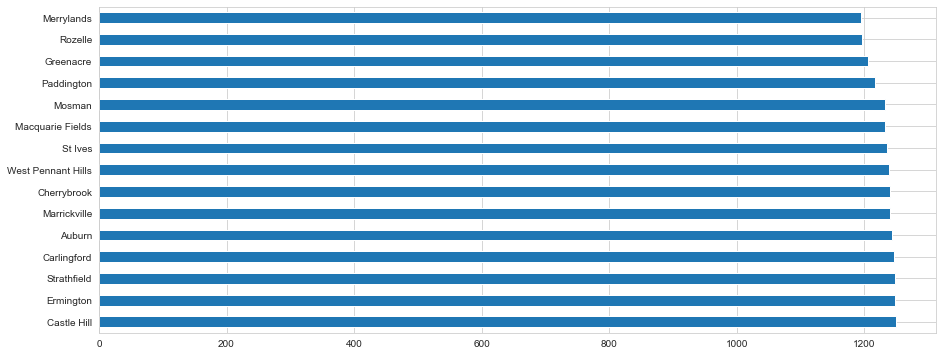

In [29]:
# Suburbs bar plot
plt.figure(figsize=(15,6))
syd["suburb"].value_counts()[:15].plot.barh()

<AxesSubplot:>

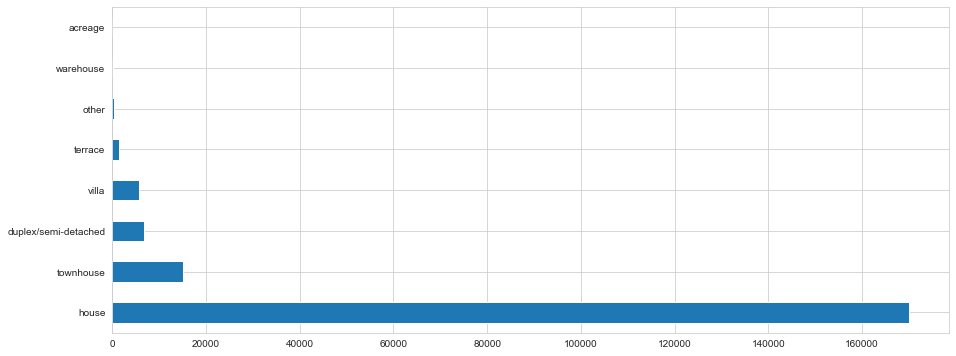

In [30]:
# Property sold type bar plot
plt.figure(figsize=(15,6))
syd["propType"].value_counts().plot.barh()

<AxesSubplot:xlabel='Month', ylabel='count'>

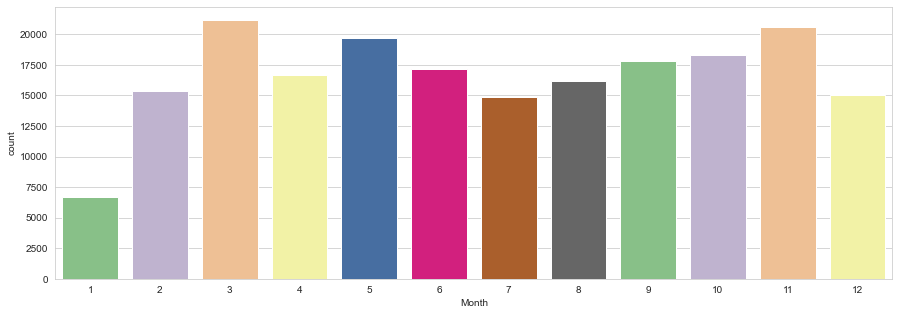

In [31]:
# Month sales counts
plt.figure(figsize=(15,5))
sns.countplot(syd["Month"],palette="Accent")

<AxesSubplot:xlabel='Month', ylabel='sellPrice'>

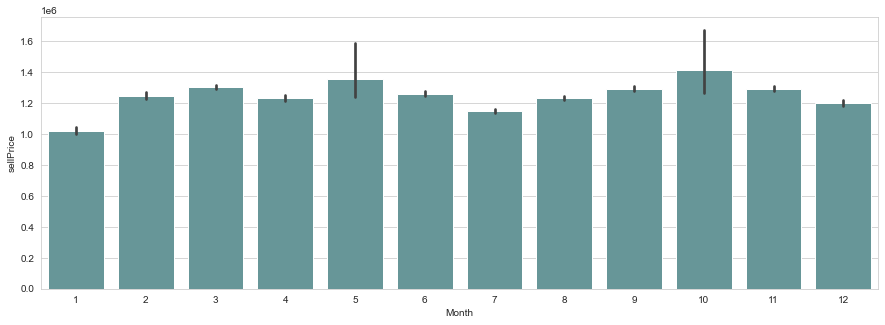

In [32]:
# Average sale price per month
plt.figure(figsize=(15,5))
sns.barplot(data=syd,x="Month",y="sellPrice",color="cadetblue")

<AxesSubplot:xlabel='Month', ylabel='sellPrice'>

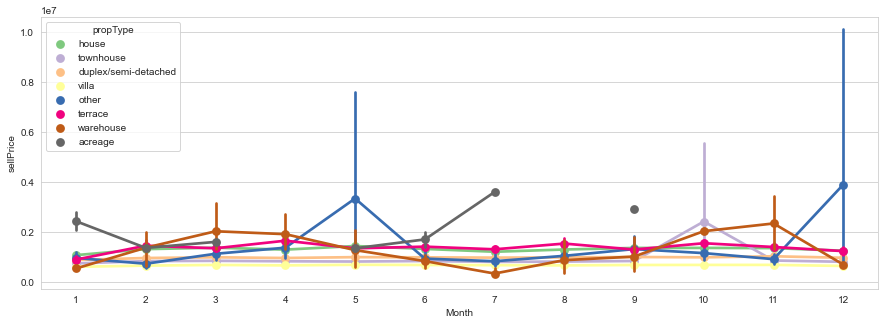

In [33]:
# Sales per month by type of property sold
plt.figure(figsize=(15,5))
sns.pointplot(data=syd,x="Month",y="sellPrice",hue="propType",palette="Accent")

<AxesSubplot:>

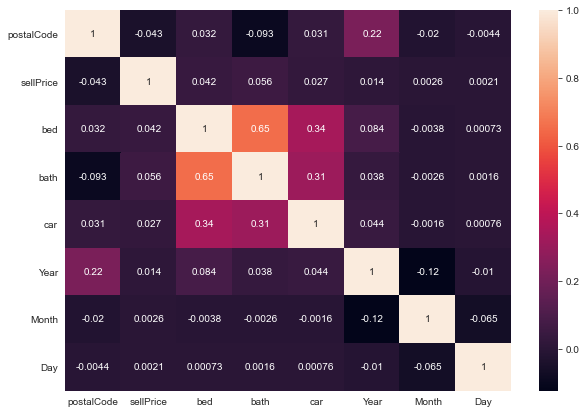

In [34]:
# Heat map testing variable correlation
plt.figure(figsize=(10,7))
sns.heatmap(syd.corr(),xticklabels=syd.corr().columns,yticklabels=syd.corr().columns,annot=True)

#### Fill Missing Data

In [35]:
syd.isnull().sum().sort_values(ascending=False)

car           18151
bed             154
suburb            0
postalCode        0
sellPrice         0
bath              0
propType          0
Year              0
Month             0
Day               0
dtype: int64

In [36]:
from sklearn.impute import KNNImputer
knn_imputer=KNNImputer()

syd["bed"]=knn_imputer.fit_transform(syd[["bed"]])
syd["car"]=knn_imputer.fit_transform(syd[["car"]])

In [37]:
syd.isnull().sum().sort_values(ascending=False)

suburb        0
postalCode    0
sellPrice     0
bed           0
bath          0
car           0
propType      0
Year          0
Month         0
Day           0
dtype: int64

### Modeling

In [38]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [39]:
syd = pd.get_dummies(syd,columns= ["suburb","propType"], prefix= ["suburb","propType"])

In [40]:
data_num=list(syd.select_dtypes(["int64","float64"]).columns)
data_num.remove("Year")
data_num.remove("Day")
data_num.remove("Month")

#### Stats Model

In [41]:
X=syd.drop(["sellPrice","Day"],axis=1)
Y=syd["sellPrice"]
X=sm.add_constant(X)

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [43]:
stats_model=sm.OLS(Y_train,X_train).fit()
print(stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:              sellPrice   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     4.429
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          5.32e-290
Time:                        11:30:28   Log-Likelihood:            -2.7013e+06
No. Observations:              159603   AIC:                         5.404e+06
Df Residuals:                  158912   BIC:                         5.411e+06
Df Model:                         690                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

#### SkLearn Model

In [44]:
X=syd.drop(["sellPrice","Day"],axis=1)
Y=syd["sellPrice"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [45]:
sklearn_model=LinearRegression().fit(X_train,Y_train)

In [46]:
cross_val_score(sklearn_model,X_train,Y_train,cv=10,scoring="r2").mean()

-3953894338076265.0

In [47]:
print("Train RMSE : ",np.sqrt(mean_squared_error(Y_train,sklearn_model.predict(X_train))))
print("Test RMSE : ",np.sqrt(mean_squared_error(Y_test,sklearn_model.predict(X_test))))

Train RMSE :  5422588.75407098
Test RMSE :  3759645675540.9263
